<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/US_Tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Tariff Calculations plus Population.csv', sep=';')
df.head(11)

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0
5,Anguilla,71.3,72.5,1.2,10%,10%,NaN
6,Antigua and Barbuda,550,573.8,23.8,10%,10%,93316.0
7,Argentina,"2,078.80","9,171.00","7,092.20",10%,10%,45538401.0
8,Armenia,39.2,160.8,121.6,10%,10%,2990900.0
9,Aruba,714.8,725.5,10.7,10%,10%,107359.0


In [4]:
df.tail(11)

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
193,United Kingdom,"11,856.90","79,941.30","68,084.50",10%,10%,68350000.0
194,Uruguay,420.2,"1,649.00","1,228.80",10%,10%,3388081.0
195,Uzbekistan,338.4,380.8,42.4,10%,10%,35652307.0
196,Vanuatu,-6.1,7.6,13.7,45%,22%,320409.0
197,Vatican City (-),112,223,226,10%,10%,NaN
198,Venezuela,"-1,755.80","4,232.00","5,987.90",29%,15%,28300854.0
199,Vietnam,"-123,463.00","13,098.20","136,561.20",90%,45%,100352192.0
200,West Bank Administered by Israel,-2.3,3.7,6,38%,19%,NaN
201,Yemen,125.2,134.1,8.9,10%,10%,39390799.0
202,Zambia,-55.3,113.8,169.1,33%,16%,20723965.0


In [9]:
df.shape

(204, 7)

In [10]:
df.columns

Index(['Country', 'US 2024 Deficit', 'US 2024 Exports',
       'US 2024 Imports (Customs Basis)', 'Trump Tariffs Alleged',
       'Trump Response', 'Population'],
      dtype='object')

In [11]:
df.dtypes

,0
Country,object
US 2024 Deficit,object
US 2024 Exports,object
US 2024 Imports (Customs Basis),object
Trump Tariffs Alleged,object
Trump Response,object
Population,float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          204 non-null    object 
 1   US 2024 Deficit                  204 non-null    object 
 2   US 2024 Exports                  204 non-null    object 
 3   US 2024 Imports (Customs Basis)  204 non-null    object 
 4   Trump Tariffs Alleged            204 non-null    object 
 5   Trump Response                   204 non-null    object 
 6   Population                       172 non-null    float64
dtypes: float64(1), object(6)
memory usage: 11.3+ KB


In [13]:
df.describe()

,Population
count,1.720000e+02
mean,4.286567e+07
std,1.602899e+08
min,9.816000e+03
25%,8.149932e+05
50%,6.833880e+06
75%,2.831881e+07
max,1.438070e+09


In [20]:
df.isnull().sum()

,0
Country,0
US 2024 Deficit,0
US 2024 Exports,0
US 2024 Imports (Customs Basis),0
Trump Tariffs Alleged,0
Trump Response,0
Population,32


In [21]:
df['Population'] = df['Population'].fillna(df['Population'].mean())

In [23]:
df.isnull().sum()

,0
Country,0
US 2024 Deficit,0
US 2024 Exports,0
US 2024 Imports (Customs Basis),0
Trump Tariffs Alleged,0
Trump Response,0
Population,0


In [24]:
df.duplicated().sum()

np.int64(0)

In [42]:
df = df.rename(columns={'US 2024 Exports': 'US_2024_Exports'})

In [44]:
df['US_2024_Exports'] = df['US_2024_Exports'].str.replace(',', '', regex=True).astype('float64').astype('int64')

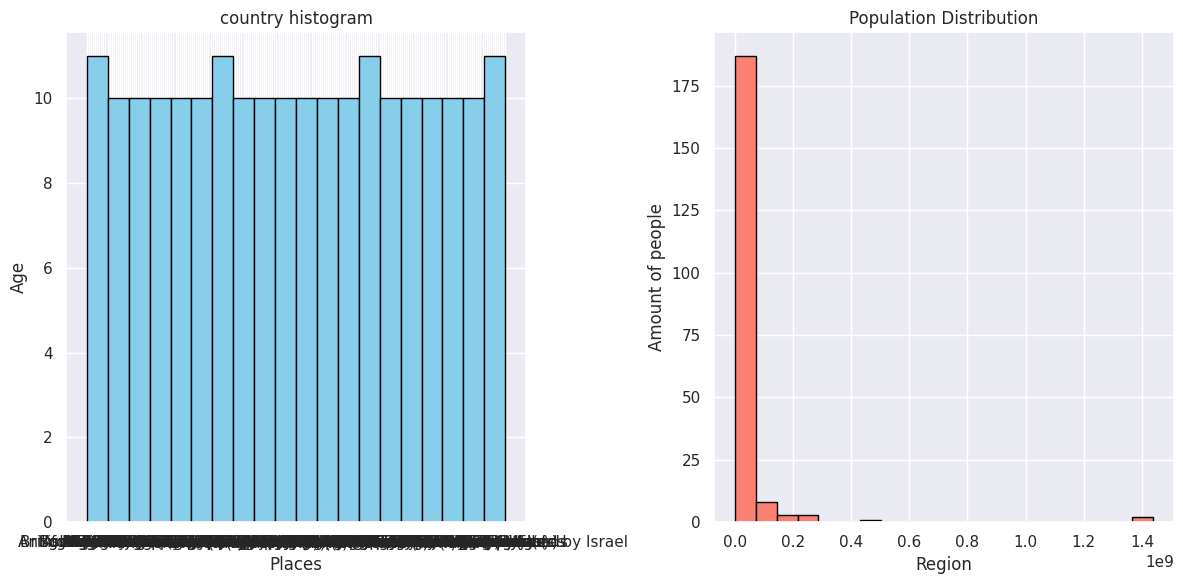

In [28]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.hist(df['Country'], bins=20, color='skyblue', edgecolor='black')
plt.title('country histogram')
plt.xlabel('Places')
plt.ylabel('Age')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.hist(df['Population'], bins=20, color='salmon', edgecolor='black')
plt.title('Population Distribution')
plt.xlabel('Region')
plt.ylabel('Amount of people')

plt.tight_layout()
plt.show()

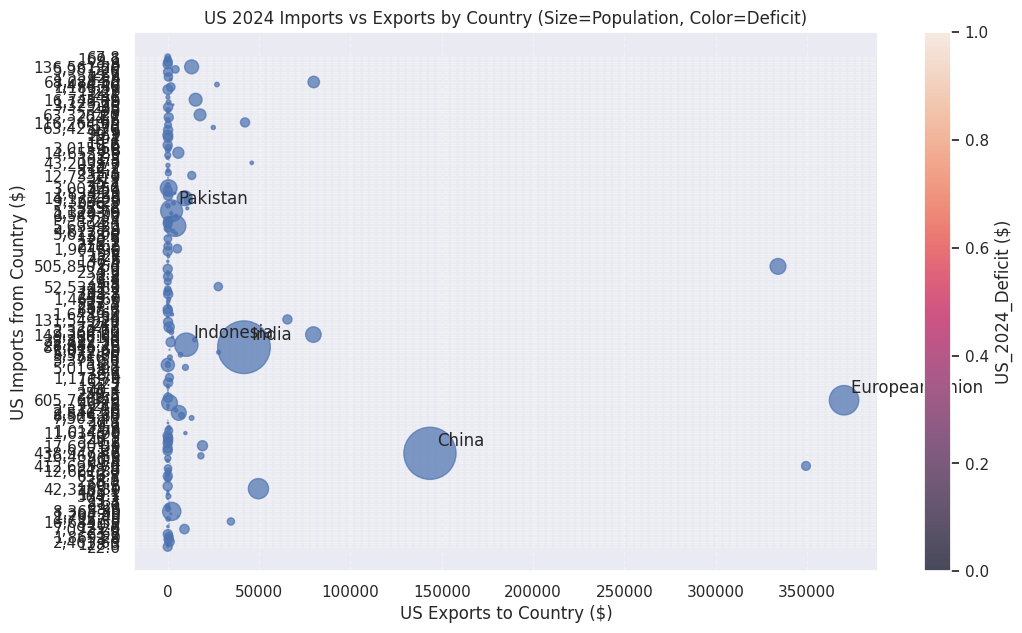

In [48]:
# Assuming your dataframe is named 'df'
plt.figure(figsize=(12, 7))

plt.scatter(
    x=df['US_2024_Exports'],
    y=df['US 2024 Imports (Customs Basis)'],
    s=df['Population']/1000000,  # Size by population (in millions)
    alpha=0.7,
    cmap='coolwarm'
)

plt.colorbar(label='US_2024_Deficit ($)')
plt.title('US 2024 Imports vs Exports by Country (Size=Population, Color=Deficit)')
plt.xlabel('US Exports to Country ($)')
plt.ylabel('US Imports from Country ($)')
plt.grid(True, linestyle='--', alpha=0.3)

# Annotate some key countries
for i, row in df.nlargest(5, 'Population').iterrows():
    plt.annotate(row['Country'], (row['US_2024_Exports'], row['US 2024 Imports (Customs Basis)']),
                 textcoords="offset points", xytext=(5,5), ha='left')

plt.show()

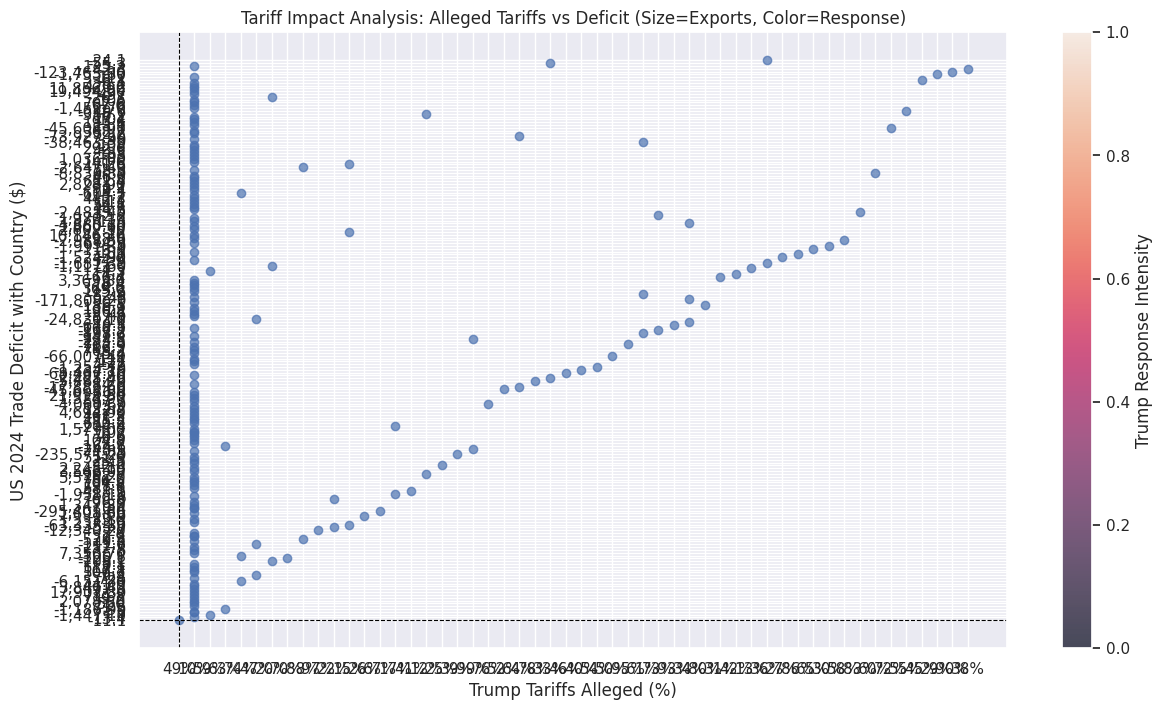

In [52]:
plt.figure(figsize=(14, 8))

scatter = plt.scatter(
    x=df['Trump Tariffs Alleged'],
    y=df['US 2024 Deficit'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(label='Trump Response Intensity')
plt.title('Tariff Impact Analysis: Alleged Tariffs vs Deficit (Size=Exports, Color=Response)')
plt.xlabel('Trump Tariffs Alleged (%)')
plt.ylabel('US 2024 Trade Deficit with Country ($)')
plt.grid(True)

# Add reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)

plt.show()

In [57]:
import plotly.express as px

fig = px.scatter(
    df,
    x='US_2024_Exports',
    y='US 2024 Imports (Customs Basis)',
    size='Population',
    color='US 2024 Deficit',
    hover_name='Country',
    hover_data=['Trump Tariffs Alleged', 'Trump Response'],
    title='US Trade Relationships by Country (2024)',
    labels={
        'US 2024 Exports': 'US Exports ($)',
        'US 2024 Imports (Customs Basis)': 'US Imports ($)',
        'US 2024 Deficit': 'Trade Deficit ($)',
        'Population': 'Country Population'
    },
    color_continuous_scale='balance'  # Shows deficit (red) vs surplus (blue)
)

# Add a reference line for balanced trade
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=0, y0=0,
    x1=max(df['US_2024_Exports'])*1.1,
    y1=max(df['US_2024_Exports'])*1.1
)

fig.update_layout(
    xaxis_title="US Exports to Country ($)",
    yaxis_title="US Imports from Country ($)",
    hovermode='closest'
)

fig.show()
plt.show()

# The output is visible in the colab::

In [16]:
# Thank you